In [ ]:
# Checking and displaying of columns
print(df.columns)

In [ ]:
# Display the info of the dataset and make description of the column counts, number of data points, some columns that contain null values, and the datatypes counts.
print(df.info())

In [60]:
# Fill NA in likes with 0, NA in comments with 0, and drop others.
df['Likes'].fillna(0, inplace=True)
df['Comments'].fillna(0, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Describe (descriptive measures: count, mean, std, min, 25%, 50%, 75%, max) the cleaned data.
print(df.describe())

In [ ]:
# Explore album type and display counts for album, single, and compilation.
album_counts = df['Album_type'].value_counts()
print(album_counts)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(album_counts, labels=album_counts.index, autopct='%1.1f%%')
plt.title('Album Types')
plt.show()

The pie chart shows that more people prefer albums over single and compilation songs, approximately 72% for albums and a combined total of 27.7% for compilation and singles.

In [ ]:
# Analyze songs by artist and views-youtube, stream-spotify.
# Top 10 Artists on Youtube
top_artists_youtube = df.groupby('Artist')['Views'].sum().nlargest(10)
print(top_artists_youtube)

# Top 10 Artists on Spotify
top_artists_spotify = df.groupby('Artist')['Stream'].sum().nlargest(10)
print(top_artists_spotify)

# Bar charts
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
top_artists_youtube.plot(kind='bar')
plt.title('Top 10 Artists on Youtube')

plt.subplot(1, 2, 2)
top_artists_spotify.plot(kind='bar')
plt.title('Top 10 Artists on Spotify')

plt.tight_layout()
plt.show()

Data shows that in both Youtube and Spotify; Ed Sheeran and Coldplay are in the top 10 of each bar stats.

In [ ]:
# Analyze Top 10 songs on the basis of views, comments, and likes: with titles Top 10 Songs with Most Views, Top 10 Songs with Most Comments, and Top 10 Songs with Most Likes.
# Top 10 Songs by Views
top_songs_views = df.nlargest(10, 'Views')
print("Top 10 Songs with Most Views:")
print(top_songs_views[['Track', 'Views']])

# Top 10 Songs by Comments
top_songs_comments = df.nlargest(10, 'Comments')
print("Top 10 Songs with Most Comments:")
print(top_songs_comments[['Track', 'Comments']])

# Top 10 Songs by Likes
top_songs_likes = df.nlargest(10, 'Likes')
print("Top 10 Songs with Most Likes:")
print(top_songs_likes[['Track', 'Likes']])

In [ ]:
# Analyzing the songs on the basis of Energy and Danceability and display a table of it.
song_features = df[['Track', 'Energy', 'Danceability', 'Acousticness']]
print(song_features)

In [ ]:
# Display a bar chart of the Top 10 Songs by Stream with their Energy, Danceability, and Acousticness and make some remarks about it.
top_10_songs_streams = df.nlargest(10, 'Stream')
plt.figure(figsize=(12, 6))
plt.bar(top_10_songs_streams['Track'], top_10_songs_streams['Stream'], color='skyblue')
plt.xlabel('Song')
plt.ylabel('Streams')
plt.title('Top 10 Songs by Stream')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In this chart, Blinding lights and Shape of you are very close in numbers in terms of streaming. While other songs are not that far behind each other.

In [ ]:
# Determine the top 10 artists on the Youtube platform whose songs have more likes and display a bar chart with a title Number of Likes per Artist and make some remarks.
top_10_artists_likes = df.groupby('Artist')['Likes'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_artists_likes.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Number of Likes')
plt.title('Number of Likes per Artist')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

BTS and BLACKPINK have similar number of likes, and both are from a korea and their fanbase vary from country to country. While other artists lack in comparison to both BTS and BLACKPINK, although these artists are not that far off from each other.

In [69]:
# Explore single releases by artists and identify top performers based on likes and display a table for each artist with their Views and Likes as the other columns.
single_releases_likes = df[df['Album_type'] == 'single'].groupby('Artist').agg({'Likes': 'sum', 'Views': 'sum'}).nlargest(10, 'Likes')
print("Top Single Releases by Artists Based on Likes and Views:")
print(single_releases_likes)

Top Single Releases by Artists Based on Likes and Views:
                     Likes         Views
Artist                                  
BLACKPINK       82959030.0  7.329516e+09
Wiz Khalifa     47790517.0  6.761550e+09
Charlie Puth    41746947.0  5.870179e+09
Jubin Nautiyal  39238542.0  4.525859e+09
Lil Nas X       39103751.0  3.031660e+09
Marshmello      35843277.0  2.927575e+09
Billie Eilish   35590580.0  2.435116e+09
Bizarrap        33922836.0  1.719856e+09
Ozuna           33337259.0  5.296919e+09
Tanishk Bagchi  33190629.0  3.774839e+09


In [70]:
# Exploring compilation releases by artists and identify top performers based on views and likes and display a table for each artist with their Views and Likes as the other columns. Make some remark about the table.
compilation_releases_likes = df[df['Album_type'] == 'compilation'].groupby('Artist').agg({'Likes': 'sum', 'Views': 'sum'}).nlargest(10, 'Views')
print("Top Compilation Releases by Artists Based on Views and Likes:")
print(compilation_releases_likes)

Top Compilation Releases by Artists Based on Views and Likes:
                         Likes         Views
Artist                                      
Shakira             20327883.0  3.463816e+09
Ellie Goulding      12418131.0  2.283748e+09
Idina Menzel         9018477.0  1.876739e+09
Dove Cameron        12002533.0  1.791463e+09
DJ Luian             8457661.0  1.586162e+09
Mambo Kingz          8457653.0  1.586162e+09
PSY                  8084738.0  1.539136e+09
Prince Royce         7120861.0  1.411704e+09
Earth, Wind & Fire   9609744.0  1.282815e+09
Badshah              5234636.0  1.242759e+09


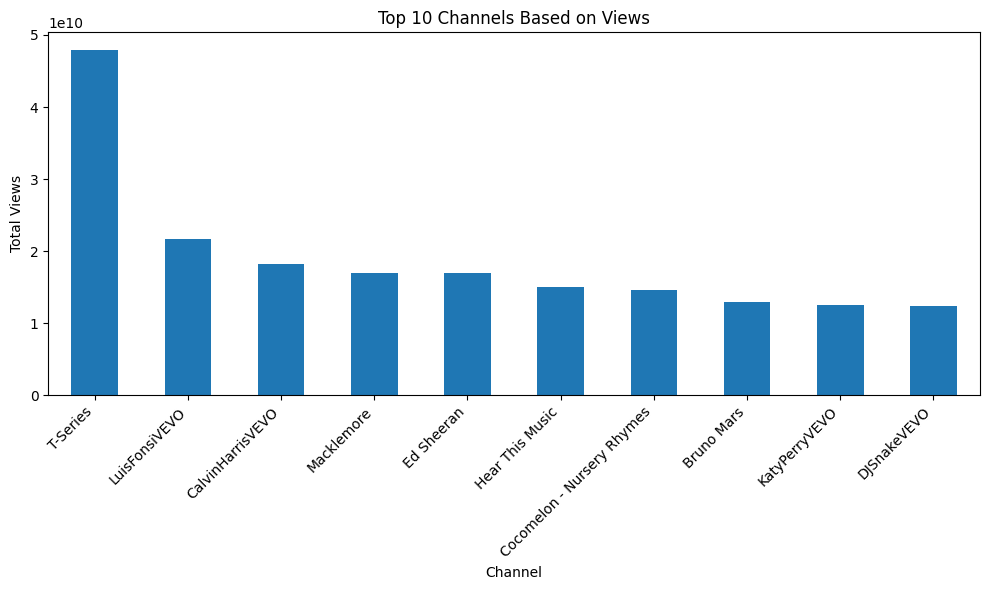

In [71]:
# Identify the top 10 channels based on views and display a bar chart of it and make some remarks.
top_10_channels = df.groupby('Channel')['Views'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_channels.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Total Views')
plt.title('Top 10 Channels Based on Views')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()